### Question 5 [10 points]

#### We reproduced Figure 2C.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [2]:
# splitting data by time slice
analysed = ds['analysed_sst']
control = analysed.sel(time = slice('2002','2012')).groupby('time.dayofyear').mean(skipna = True)
data = analysed.sel(time=slice('2002', '2016-07')).groupby('time.dayofyear')
anomalities = (data - control).idxmax('time', skipna=True).dt.year

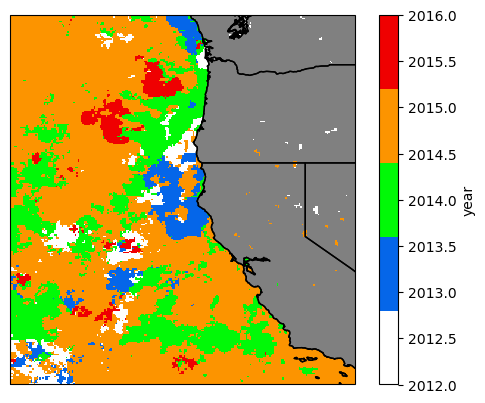

In [3]:
# Replace values less than 2013 with 2012
anomalities_plot = anomalities.where((anomalities >= 2013) | anomalities.isnull(), other=2012)

import matplotlib.pyplot as plt
import numpy as np

# Define the colors for each year using hex values
colors = ['#FFFFFF',   # white for years before 2013
          '#0566E9',   # blue for 2013
          '#01F907',   # green for 2014
          '#FC9400',   # orange for 2015
          '#EF0001']   # red for 2016


# Create a custom colormap with the specified colors
cmap = plt.cm.colors.ListedColormap(colors)

# Plot on a map
ax = plt.subplot(projection=crs)
anomalities_plot.plot(cmap=cmap)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))